In [17]:
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu
from pandas.plotting import table
import matplotlib.pyplot as plt
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import scipy as sp
import scienceplots

In [18]:
plt.style.use('science')

# Get the hex codes for the colors so we can assign them to categories
pal = sns.color_palette('Paired')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[5], 'Two-Domain': pal[1], 'Autoinhibitory': pal[3], 'Autoinhibitory (Active)': pal[2], 'Autoinhibitory (Autoinhibited)': pal[3], 
          'Full': pal[3], 'Clusters': pal[7], 'Two-State AI': pal[4], 'Autoinhibitory (Closed)': pal[5], 'Autoinhibitory (Open)': pal[4]}
pal.as_hex()

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

In [19]:
# Load the data
cl = pd.read_csv('./project_pipeline/data/classified_files.tsv', sep='\t')
rmsd = pd.read_csv('./project_pipeline/data/rmsds.tsv', sep='\t').astype('object')
md = pd.read_csv('./project_pipeline/data/md_rmsds.tsv', sep='\t').astype('object')

cl.head()

,uniprot,pdb,region_1,region_2,complex_rmsd,percent_region_1,percent_region_2,2_aligned,2_comp,state,conformation,organism,date,notes
0,P04637,8f2h,364-393,102-292,30.431,100.0,100.000000,3.065,70.729,Autoinhibited,Closed,"""Homo sapiens""",['2022-11-08'],NaN
1,P04637,8f2i,364-393,102-292,30.431,100.0,100.000000,3.065,70.729,Autoinhibited,Closed,"""Homo sapiens""",['2022-11-08'],NaN
2,P00523,2ptk,"148-245,246-266","81-142,521-533",1.737,100.0,89.333333,1.921,3.093,Autoinhibited,Closed,Gallus gallus,['1997-06-17'],NaN
3,P28482,1pme,173-196,"25-172,197-313",2.422,100.0,96.603774,1.220,6.639,Autoinhibited,Closed,Homo sapiens,['1998-06-08'],NaN
4,P28482,1tvo,173-196,"25-172,197-313",2.497,100.0,100.000000,1.523,6.633,Autoinhibited,Closed,Homo sapiens,['2004-06-30'],NaN


In [20]:
# We need to group by protein (uniprot) and find the minimum value of the 2_comp column

exem = cl.sort_values('2_comp').groupby('uniprot', as_index=False).first()

print(exem['conformation'].value_counts())


Closed    116
Open       12
Name: conformation, dtype: int64


In [21]:
# We want only closed structures
exem_closed = exem[exem['conformation'] == 'Closed']
print(len(exem_closed))
closed_uniprots = exem_closed['uniprot'].tolist()
closed_pdb = exem_closed['pdb'].tolist()

md_exem = md.sort_values('2_comp').groupby('uniprot', as_index=False).first()
md_pdb = md_exem['pdb'].tolist()
print(len(md_exem))
print(md_pdb)

116
40
['5ups', '6m01', '5tw8', '5wm5', '7vxq', '5kei', '5iz1', '4ir8', '3myr', '6ur9', '4ueq', '3ayz', '4wv3', '4d4i', '5n4b', '5n9x', '7a9j', '3dy5', '1ohe', '4mgf', '2j3x', '1ig8', '5n0c', '1a62', '1qme', '1e8n', '1pyy', '1ru3', '5zwk', '6e97', '3pbs', '4rmn', '6ruc', '3txm', '2p3y', '3cw9', '4cdp', '3a9u', '6s62', '1e3d']


In [22]:
ai1 = pd.read_csv('./project_pipeline/data/ai_dockq_results.csv').astype('object')
md_dockq = pd.read_csv('./project_pipeline/data/md_dockq_results.csv').astype('object')

ai = ai1[ai1['uniprot'].isin(closed_uniprots)].reset_index(drop=True)

md_dockq = md_dockq[md_dockq['pdb'].isin(md_pdb)].reset_index(drop=True)
print(len(ai))

861


In [23]:
md_dockq['type'] = 'Two-Domain'
md_dockq.head()


ai['type'] = 'Autoinhibitory (Closed)'

ai_sub = ai[['uniprot', 'pdb', 'fnat', 'fnat_correct', 'fnat_total', 'fnonnat',
       'fnonnat_nnative', 'fnonnat_model', 'irms', 'lrms', 'dockq', 'capri',
       'type']]

plot = pd.concat([ai_sub, md_dockq], ignore_index=True)
plot.head()

,uniprot,pdb,fnat,fnat_correct,fnat_total,fnonnat,fnonnat_nnative,fnonnat_model,irms,lrms,dockq,capri,type
0,P28482,4qp6,0.913,63,69,0.222,18,81,1.644,3.298,0.745,Medium,Autoinhibitory (Closed)
1,P62826,5uwh,1.0,5,5,0.286,2,7,1.03,40.342,0.574,Medium,Autoinhibitory (Closed)
2,Q8IXJ6,4r8m,0.989,90,91,0.032,3,93,0.459,0.77,0.965,High,Autoinhibitory (Closed)
3,P28482,6gjb,0.8,64,80,0.439,50,114,2.574,5.796,0.579,Medium,Autoinhibitory (Closed)
4,P28482,7nr3,0.833,60,72,0.455,50,110,2.533,5.722,0.594,Medium,Autoinhibitory (Closed)


/tmp/ipykernel_1388301/2907441062.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


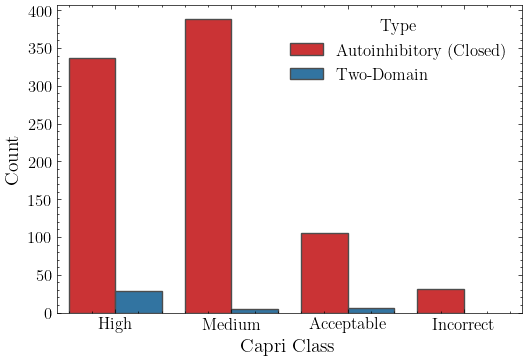

In [24]:
# Make the capri class categorical
plot['capri'] = pd.Categorical(plot['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Make histograms of both
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Autoinhibitory DockQ
sns.countplot(data=plot, x='capri', hue='type', ax=ax, palette=colors, edgecolor='.3')
ax.set_xlabel('Capri Class', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Type', fontsize=12, title_fontsize=12)

plt.savefig('./project_pipeline/data/figures/all_closed_dockq_histograms.png', dpi=300)